In [2]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

Looking in indexes: http://192.168.0.94:8888/repository/pypi/simple
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ui3bnccz
  Running command git clone -q https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ui3bnccz
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=46b7960061c186e19dbcb51fcef784623009aef60d06831049a4dc184f7f930c
  Stored in directory: /tmp/pip-ephem-wheel-cache-6dohkyu6/wheels/6e/b2/38/082465c177a067501384fd15cb18be1128372ef60f27a1c426
Successfully built segment-anything
You should consider upgrading via the '/home/ma-user/anaconda3/envs/TensorFlow-2.1/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
!pip install opencv-python pycocotools matplotlib onnxruntime onnx

Looking in indexes: http://192.168.0.94:8888/repository/pypi/simple
     |████████████████████████████████| 5.0 MB 41.8 MB/s eta 0:00:01
     |████████████████████████████████| 14.6 MB 80.7 MB/s eta 0:00:01
     |████████████████████████████████| 311 kB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 66.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 41.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 70.9 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 87.2 MB/s eta 0:00:01
     |████████████████████████████████| 536 kB 77.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
ERROR: pip's dependency resolver does not currently take into acco

In [4]:
!curl -O https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2445M  100 2445M    0     0   145M      0  0:00:16  0:00:16 --:--:--  138M


In [5]:
!pip install torchvision 

Looking in indexes: http://192.168.0.94:8888/repository/pypi/simple
     |████████████████████████████████| 24.2 MB 66.4 MB/s eta 0:00:01
     |████████████████████████████████| 887.5 MB 111.5 MB/s eta 0:00:01     |██████████████▋                 | 406.1 MB 101.3 MB/s eta 0:00:05     |████████████████▎               | 452.8 MB 101.3 MB/s eta 0:00:05     |██████████████████▊             | 519.5 MB 115.7 MB/s eta 0:00:04
     |████████████████████████████████| 557.1 MB 123.1 MB/s eta 0:00:01   |█▌                              | 26.9 MB 69.4 MB/s eta 0:00:08
     |████████████████████████████████| 21.0 MB 84.0 MB/s eta 0:00:01
     |████████████████████████████████| 317.1 MB 115.3 MB/s eta 0:00:01
     |████████████████████████████████| 849 kB 89.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ma-user/anaconda3/envs/TensorFlow-2.1/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
import torch
import torchvision
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

/home/ma-user/anaconda3/envs/TensorFlow-2.1/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [17]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [8]:
image = cv2.imread('/home/ma-user/work/c_minds/frames/frames5/0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


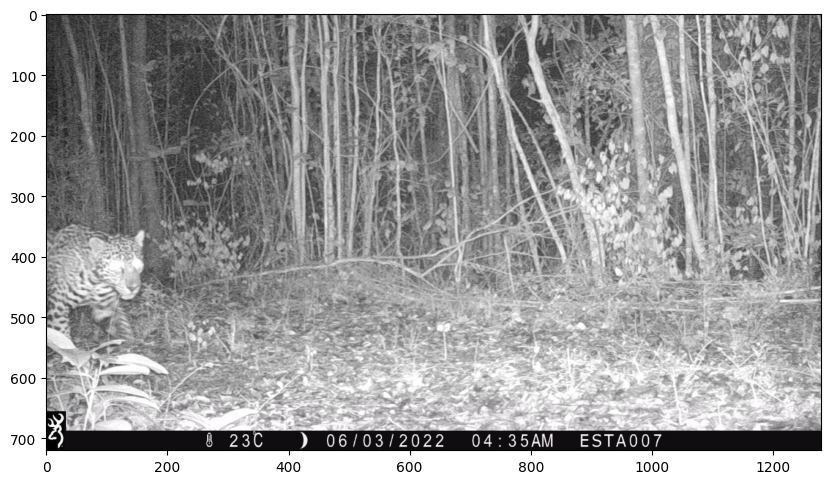

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()


In [23]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [24]:
predictor.set_image(image)


In [25]:
input_box = np.array([0,350,180,600])


In [26]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

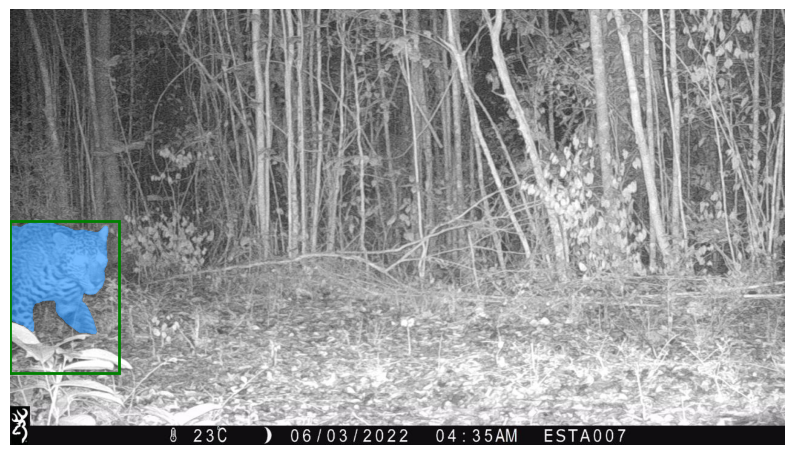

In [27]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [16]:
masks.shape

(1, 720, 1280)

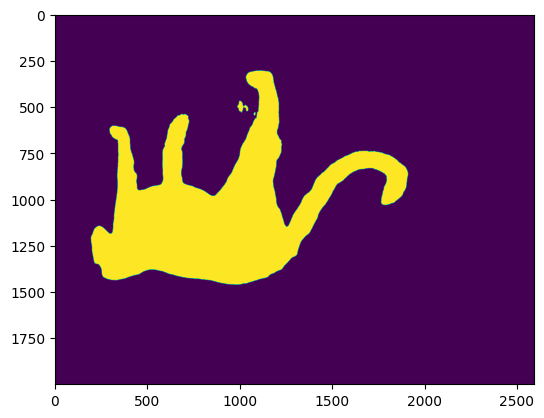

In [121]:
plt.imshow(masks[0])

# Remove background 



We are going to remove the brack-ground 
of the images. we will make 
use of SAM 

Segment anything model to remove 
the background.

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("csvs/phase2_processing_ext.csv")
df

,Unnamed: 0,annotation,usage,source,id,sample-type,img,xml,img_state,xmin,ymin,xmax,ymax,label
0,0,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM026 Darwin...,0012d9931ab1a96ccede6a26ced20fa2,0,indv_prona/JM026 Darwin/436964_2362703_2021 (3...,annotation/V001/annotations/JM026 Darwin/43696...,usefull,6,206,468,488,jaguar
1,1,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM012 Deo/JM...,002193526a1f1ab7f402e065fae566d9,0,indv_prona/JM012 Deo/JM012 Deo_original_436798...,annotation/V001/annotations/JM012 Deo/JM012 De...,usefull,872,759,1488,1939,jaguar
2,2,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JH014 Yeimy/...,002e972b91574250a58646f25dd73d3b,0,indv_prona/JH014 Yeimy/437129_2360603_2022 (26...,annotation/V001/annotations/JH014 Yeimy/437129...,usefull,248,275,806,517,jaguar
3,3,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JH002 Chanti...,00393cfce0d7ea9b88cd283a53ff33d4,0,indv_prona/JH002 Chantico/JH002 Chantico_origi...,annotation/V001/annotations/JH002 Chantico/JH0...,usefull,311,16,2575,1645,jaguar
4,4,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM026 Darwin...,004d528102b088a895e1f3bb50422ebf,0,indv_prona/JM026 Darwin/436879_2359092_2021 (3...,annotation/V001/annotations/JM026 Darwin/43687...,usefull,1204,500,2561,1535,jaguar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,5073,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM025 Ramón/...,b5bf19054942b12ea9d3a8fe08658403,0,indv_prona/JM025 Ramón/JM025 Ramón_original_V_...,annotation/V001/annotations/JM025 Ramón/JM025 ...,usefull,0,0,1085,715,jaguar
4643,5074,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM002 Pantal...,b5c59e37a75101edead56a2fa8a28459,0,indv_prona/JM002 Pantalones/437086_2362819_EL ...,annotation/V001/annotations/JM002 Pantalones/4...,usefull,892,535,1242,762,jaguar
4644,5075,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM023 Macari...,b5d5c59c882523deb2f1b632022ef3d9,0,indv_prona/JM023 Macario/JM023 Macario_origina...,annotation/V001/annotations/JM023 Macario/JM02...,usefull,0,447,680,1548,jaguar
4645,5076,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM007 Othelo...,b5d6c680a22e7504d12ff3de12d3865e,0,indv_prona/JM007 Othelo/JM007 Othelo_original_...,annotation/V001/annotations/JM007 Othelo/JM007...,usefull,964,581,1997,1446,jaguar


In [22]:
df.iloc[1,6]

'indv_prona/JM012 Deo/JM012 Deo_original_436798_2359121_NLsitio 03_B_2013_1236 JM-7a (1)(1).JPG_6368451e-7374-47ea-a501-6e05e9852be9.JPG'

In [38]:
df.iloc[1,9]

872

In [123]:
def get_indv(data):
    return data.split("/")[1]

In [124]:
df["indv"] = df["img"].apply(get_indv)

In [125]:
df

,Unnamed: 0,annotation,usage,source,id,sample-type,img,xml,img_state,xmin,ymin,xmax,ymax,label,indv
0,0,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM026 Darwin...,0012d9931ab1a96ccede6a26ced20fa2,0,indv_prona/JM026 Darwin/436964_2362703_2021 (3...,annotation/V001/annotations/JM026 Darwin/43696...,usefull,6,206,468,488,jaguar,JM026 Darwin
1,1,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM012 Deo/JM...,002193526a1f1ab7f402e065fae566d9,0,indv_prona/JM012 Deo/JM012 Deo_original_436798...,annotation/V001/annotations/JM012 Deo/JM012 De...,usefull,872,759,1488,1939,jaguar,JM012 Deo
2,2,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JH014 Yeimy/...,002e972b91574250a58646f25dd73d3b,0,indv_prona/JH014 Yeimy/437129_2360603_2022 (26...,annotation/V001/annotations/JH014 Yeimy/437129...,usefull,248,275,806,517,jaguar,JH014 Yeimy
3,3,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JH002 Chanti...,00393cfce0d7ea9b88cd283a53ff33d4,0,indv_prona/JH002 Chantico/JH002 Chantico_origi...,annotation/V001/annotations/JH002 Chantico/JH0...,usefull,311,16,2575,1645,jaguar,JH002 Chantico
4,4,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM026 Darwin...,004d528102b088a895e1f3bb50422ebf,0,indv_prona/JM026 Darwin/436879_2359092_2021 (3...,annotation/V001/annotations/JM026 Darwin/43687...,usefull,1204,500,2561,1535,jaguar,JM026 Darwin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,5073,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM025 Ramón/...,b5bf19054942b12ea9d3a8fe08658403,0,indv_prona/JM025 Ramón/JM025 Ramón_original_V_...,annotation/V001/annotations/JM025 Ramón/JM025 ...,usefull,0,0,1085,715,jaguar,JM025 Ramón
4643,5074,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM002 Pantal...,b5c59e37a75101edead56a2fa8a28459,0,indv_prona/JM002 Pantalones/437086_2362819_EL ...,annotation/V001/annotations/JM002 Pantalones/4...,usefull,892,535,1242,762,jaguar,JM002 Pantalones
4644,5075,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM023 Macari...,b5d5c59c882523deb2f1b632022ef3d9,0,indv_prona/JM023 Macario/JM023 Macario_origina...,annotation/V001/annotations/JM023 Macario/JM02...,usefull,0,447,680,1548,jaguar,JM023 Macario
4645,5076,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM007 Othelo...,b5d6c680a22e7504d12ff3de12d3865e,0,indv_prona/JM007 Othelo/JM007 Othelo_original_...,annotation/V001/annotations/JM007 Othelo/JM007...,usefull,964,581,1997,1446,jaguar,JM007 Othelo


In [126]:
df.to_csv("csvs/pro_df_31_08_23.csv")

In [127]:
df.groupby("indv").count()

,Unnamed: 0,annotation,usage,source,id,sample-type,img,xml,img_state,xmin,ymin,xmax,ymax,label
indv,,,,,,,,,,,,,,
JD001,81,81,81,81,81,81,81,81,81,81,81,81,81,81
JD002,81,81,81,81,81,81,81,81,81,81,81,81,81,81
JD003,70,70,70,70,70,70,70,70,70,70,70,70,70,70
JD005,62,62,62,62,62,62,62,62,62,62,62,62,62,62
JD006,60,60,60,60,60,60,60,60,60,60,60,60,60,60
JD008,74,74,74,74,74,74,74,74,74,74,74,74,74,74
JD009,67,67,67,67,67,67,67,67,67,67,67,67,67,67
JD010,30,30,30,30,30,30,30,30,30,30,30,30,30,30
JD011,53,53,53,53,53,53,53,53,53,53,53,53,53,53


In [139]:
#image without bg new path
df.iloc[1,6].replace("indv_prona/","sam_data/img_no_bg/")

'sam_data/img_no_bg/JM012 Deo/JM012 Deo_original_436798_2359121_NLsitio 03_B_2013_1236 JM-7a (1)(1).JPG_6368451e-7374-47ea-a501-6e05e9852be9.JPG'

In [140]:

#masks paths
df.iloc[1,6].replace("indv_prona/","sam_data/masks/")+".npy"

'sam_data/masks/JM012 Deo/JM012 Deo_original_436798_2359121_NLsitio 03_B_2013_1236 JM-7a (1)(1).JPG_6368451e-7374-47ea-a501-6e05e9852be9.JPG.npy'

In [142]:
def masks_paths(data):
    return data.replace("indv_prona/","sam_data/masks/")+".npy"


def new_img_paths(data):
    return data.replace("indv_prona/","sam_data/img_no_bg/")

In [143]:
df["img_n_bg"] = df["img"].apply(new_img_paths)
df

,Unnamed: 0,annotation,usage,source,id,sample-type,img,xml,img_state,xmin,ymin,xmax,ymax,label,indv,img_n_bg
0,0,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM026 Darwin...,0012d9931ab1a96ccede6a26ced20fa2,0,indv_prona/JM026 Darwin/436964_2362703_2021 (3...,annotation/V001/annotations/JM026 Darwin/43696...,usefull,6,206,468,488,jaguar,JM026 Darwin,sam_data/img_no_bg/JM026 Darwin/436964_2362703...
1,1,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM012 Deo/JM...,002193526a1f1ab7f402e065fae566d9,0,indv_prona/JM012 Deo/JM012 Deo_original_436798...,annotation/V001/annotations/JM012 Deo/JM012 De...,usefull,872,759,1488,1939,jaguar,JM012 Deo,sam_data/img_no_bg/JM012 Deo/JM012 Deo_origina...
2,2,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JH014 Yeimy/...,002e972b91574250a58646f25dd73d3b,0,indv_prona/JH014 Yeimy/437129_2360603_2022 (26...,annotation/V001/annotations/JH014 Yeimy/437129...,usefull,248,275,806,517,jaguar,JH014 Yeimy,sam_data/img_no_bg/JH014 Yeimy/437129_2360603_...
3,3,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JH002 Chanti...,00393cfce0d7ea9b88cd283a53ff33d4,0,indv_prona/JH002 Chantico/JH002 Chantico_origi...,annotation/V001/annotations/JH002 Chantico/JH0...,usefull,311,16,2575,1645,jaguar,JH002 Chantico,sam_data/img_no_bg/JH002 Chantico/JH002 Chanti...
4,4,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM026 Darwin...,004d528102b088a895e1f3bb50422ebf,0,indv_prona/JM026 Darwin/436879_2359092_2021 (3...,annotation/V001/annotations/JM026 Darwin/43687...,usefull,1204,500,2561,1535,jaguar,JM026 Darwin,sam_data/img_no_bg/JM026 Darwin/436879_2359092...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,5073,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM025 Ramón/...,b5bf19054942b12ea9d3a8fe08658403,0,indv_prona/JM025 Ramón/JM025 Ramón_original_V_...,annotation/V001/annotations/JM025 Ramón/JM025 ...,usefull,0,0,1085,715,jaguar,JM025 Ramón,sam_data/img_no_bg/JM025 Ramón/JM025 Ramón_ori...
4643,5074,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM002 Pantal...,b5c59e37a75101edead56a2fa8a28459,0,indv_prona/JM002 Pantalones/437086_2362819_EL ...,annotation/V001/annotations/JM002 Pantalones/4...,usefull,892,535,1242,762,jaguar,JM002 Pantalones,sam_data/img_no_bg/JM002 Pantalones/437086_236...
4644,5075,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM023 Macari...,b5d5c59c882523deb2f1b632022ef3d9,0,indv_prona/JM023 Macario/JM023 Macario_origina...,annotation/V001/annotations/JM023 Macario/JM02...,usefull,0,447,680,1548,jaguar,JM023 Macario,sam_data/img_no_bg/JM023 Macario/JM023 Macario...
4645,5076,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM007 Othelo...,b5d6c680a22e7504d12ff3de12d3865e,0,indv_prona/JM007 Othelo/JM007 Othelo_original_...,annotation/V001/annotations/JM007 Othelo/JM007...,usefull,964,581,1997,1446,jaguar,JM007 Othelo,sam_data/img_no_bg/JM007 Othelo/JM007 Othelo_o...


In [144]:
df["masks"] = df["img"].apply(masks_paths)
df

,Unnamed: 0,annotation,usage,source,id,sample-type,img,xml,img_state,xmin,ymin,xmax,ymax,label,indv,img_n_bg,masks
0,0,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM026 Darwin...,0012d9931ab1a96ccede6a26ced20fa2,0,indv_prona/JM026 Darwin/436964_2362703_2021 (3...,annotation/V001/annotations/JM026 Darwin/43696...,usefull,6,206,468,488,jaguar,JM026 Darwin,sam_data/img_no_bg/JM026 Darwin/436964_2362703...,sam_data/masks/JM026 Darwin/436964_2362703_202...
1,1,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM012 Deo/JM...,002193526a1f1ab7f402e065fae566d9,0,indv_prona/JM012 Deo/JM012 Deo_original_436798...,annotation/V001/annotations/JM012 Deo/JM012 De...,usefull,872,759,1488,1939,jaguar,JM012 Deo,sam_data/img_no_bg/JM012 Deo/JM012 Deo_origina...,sam_data/masks/JM012 Deo/JM012 Deo_original_43...
2,2,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JH014 Yeimy/...,002e972b91574250a58646f25dd73d3b,0,indv_prona/JH014 Yeimy/437129_2360603_2022 (26...,annotation/V001/annotations/JH014 Yeimy/437129...,usefull,248,275,806,517,jaguar,JH014 Yeimy,sam_data/img_no_bg/JH014 Yeimy/437129_2360603_...,sam_data/masks/JH014 Yeimy/437129_2360603_2022...
3,3,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JH002 Chanti...,00393cfce0d7ea9b88cd283a53ff33d4,0,indv_prona/JH002 Chantico/JH002 Chantico_origi...,annotation/V001/annotations/JH002 Chantico/JH0...,usefull,311,16,2575,1645,jaguar,JH002 Chantico,sam_data/img_no_bg/JH002 Chantico/JH002 Chanti...,sam_data/masks/JH002 Chantico/JH002 Chantico_o...
4,4,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM026 Darwin...,004d528102b088a895e1f3bb50422ebf,0,indv_prona/JM026 Darwin/436879_2359092_2021 (3...,annotation/V001/annotations/JM026 Darwin/43687...,usefull,1204,500,2561,1535,jaguar,JM026 Darwin,sam_data/img_no_bg/JM026 Darwin/436879_2359092...,sam_data/masks/JM026 Darwin/436879_2359092_202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,5073,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM025 Ramón/...,b5bf19054942b12ea9d3a8fe08658403,0,indv_prona/JM025 Ramón/JM025 Ramón_original_V_...,annotation/V001/annotations/JM025 Ramón/JM025 ...,usefull,0,0,1085,715,jaguar,JM025 Ramón,sam_data/img_no_bg/JM025 Ramón/JM025 Ramón_ori...,sam_data/masks/JM025 Ramón/JM025 Ramón_origina...
4643,5074,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM002 Pantal...,b5c59e37a75101edead56a2fa8a28459,0,indv_prona/JM002 Pantalones/437086_2362819_EL ...,annotation/V001/annotations/JM002 Pantalones/4...,usefull,892,535,1242,762,jaguar,JM002 Pantalones,sam_data/img_no_bg/JM002 Pantalones/437086_236...,sam_data/masks/JM002 Pantalones/437086_2362819...
4644,5075,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM023 Macari...,b5d5c59c882523deb2f1b632022ef3d9,0,indv_prona/JM023 Macario/JM023 Macario_origina...,annotation/V001/annotations/JM023 Macario/JM02...,usefull,0,447,680,1548,jaguar,JM023 Macario,sam_data/img_no_bg/JM023 Macario/JM023 Macario...,sam_data/masks/JM023 Macario/JM023 Macario_ori...
4645,5076,"[{'annotation-format': 'PASCAL VOC', 'type': '...",train,s3://bucket-beta-test/indv_prona2/JM007 Othelo...,b5d6c680a22e7504d12ff3de12d3865e,0,indv_prona/JM007 Othelo/JM007 Othelo_original_...,annotation/V001/annotations/JM007 Othelo/JM007...,usefull,964,581,1997,1446,jaguar,JM007 Othelo,sam_data/img_no_bg/JM007 Othelo/JM007 Othelo_o...,sam_data/masks/JM007 Othelo/JM007 Othelo_origi...


In [146]:
df.to_csv("csvs/pro_df_31_08_23.csv")

In [42]:
import time
from datetime import timedelta


In [148]:
df.iloc[n,-1]

'sam_data/masks/JH007 Hani/JH007 Hani_original_Sitio_3_Cdy00003.JPG_03096dda-55ae-4ce3-91ac-43489ce1071e.JPG.npy'

In [149]:
df.iloc[n,-2]

'sam_data/img_no_bg/JH007 Hani/JH007 Hani_original_Sitio_3_Cdy00003.JPG_03096dda-55ae-4ce3-91ac-43489ce1071e.JPG'

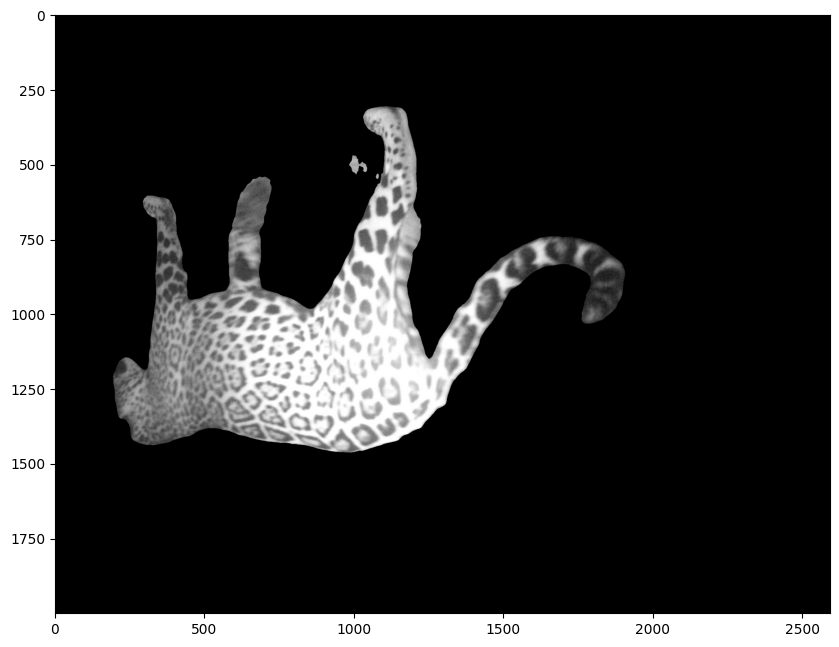

1.4285690784454346
0:00:01.428569


In [115]:
n = 557

start = time.time()




image = cv2.imread(df.iloc[n,6])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
#plt.imshow(image)
#plt.axis('on')
#plt.show()


predictor.set_image(image)


input_box = np.array([df.iloc[n,9],df.iloc[n,10],df.iloc[n,11],df.iloc[n,12]])


masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)



output_image = remove_backg_sam(image,masks)

plt.imshow(output_image)
plt.show()


end = time.time()
print(end-start)

#plt.figure(figsize=(10, 10))
#plt.imshow(image)
#show_mask(masks[0], plt.gca())
#show_box(input_box, plt.gca())
#plt.axis('off')
#plt.show()

elapsed=end-start
print(str(timedelta(seconds=elapsed)))


In [87]:
image.shape

(1080, 1920, 3)

In [117]:
type(masks)

numpy.ndarray

In [118]:
type(output_image)

numpy.ndarray

In [119]:

# save numpy array as npy file
#from numpy import asarray
from numpy import save
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('data.npy', masks)

In [120]:
from PIL import Image
im = Image.fromarray(output_image)
im.save("data_your_file.JPG")

In [129]:
import cv2
import os

In [112]:
def remove_backg_sam(image,mask):
    bg_image = np.zeros((image.shape[0],image.shape[1], 3),
                            dtype = np.uint8)
    # displaying the image
    #plt.imshow(bg_image)
    condition = np.stack(
        (masks[0],) * 3, axis=-1) > 0.5

    #bg_image = cv2.resize(bg_image, (width, height))

    output_image = np.where(condition,image, bg_image)
    #plt.imshow(output_image)
    #plt.show()
    return output_image
    

In [122]:
df.iloc[2,6]

'indv_prona/JH014 Yeimy/437129_2360603_2022 (265).jpg'

In [130]:
#we need to create the directory for the new images 

parent_dir = "sam_data/img_no_bg"
for i in df.groupby("indv").count().index: 
    #print(i)
    directory = i
  
    # Parent Directory path
    # Path
    path = os.path.join(parent_dir, directory)
    os.mkdir(path)
    print(path)

sam_data/img_no_bg/JD001
sam_data/img_no_bg/JD002
sam_data/img_no_bg/JD003
sam_data/img_no_bg/JD005
sam_data/img_no_bg/JD006
sam_data/img_no_bg/JD008
sam_data/img_no_bg/JD009
sam_data/img_no_bg/JD010
sam_data/img_no_bg/JD011
sam_data/img_no_bg/JD013
sam_data/img_no_bg/JD014
sam_data/img_no_bg/JH001 Gaia
sam_data/img_no_bg/JH002 Chantico
sam_data/img_no_bg/JH002 Chatinco
sam_data/img_no_bg/JH003 Maia
sam_data/img_no_bg/JH004 Calista
sam_data/img_no_bg/JH005 Domi
sam_data/img_no_bg/JH006 Pía
sam_data/img_no_bg/JH007 Hani
sam_data/img_no_bg/JH008 Olivia
sam_data/img_no_bg/JH009 Camelia
sam_data/img_no_bg/JH010 Sarabi
sam_data/img_no_bg/JH012 Dara
sam_data/img_no_bg/JH012 Padme
sam_data/img_no_bg/JH013 Leia
sam_data/img_no_bg/JH014 Yeimy
sam_data/img_no_bg/JH015 Ixchel
sam_data/img_no_bg/JM001 Gucci
sam_data/img_no_bg/JM002 Pantalones
sam_data/img_no_bg/JM0027 Bakary
sam_data/img_no_bg/JM003 Orien
sam_data/img_no_bg/JM004 Gulliver
sam_data/img_no_bg/JM005 Sirius
sam_data/img_no_bg/JM006 Ro

In [131]:
#we need to create the directory for the new images 

parent_dir = "sam_data/masks"
for i in df.groupby("indv").count().index: 
    #print(i)
    directory = i
  
    # Parent Directory path
    # Path
    path = os.path.join(parent_dir, directory)
    os.mkdir(path)
    print(path)

sam_data/masks/JD001
sam_data/masks/JD002
sam_data/masks/JD003
sam_data/masks/JD005
sam_data/masks/JD006
sam_data/masks/JD008
sam_data/masks/JD009
sam_data/masks/JD010
sam_data/masks/JD011
sam_data/masks/JD013
sam_data/masks/JD014
sam_data/masks/JH001 Gaia
sam_data/masks/JH002 Chantico
sam_data/masks/JH002 Chatinco
sam_data/masks/JH003 Maia
sam_data/masks/JH004 Calista
sam_data/masks/JH005 Domi
sam_data/masks/JH006 Pía
sam_data/masks/JH007 Hani
sam_data/masks/JH008 Olivia
sam_data/masks/JH009 Camelia
sam_data/masks/JH010 Sarabi
sam_data/masks/JH012 Dara
sam_data/masks/JH012 Padme
sam_data/masks/JH013 Leia
sam_data/masks/JH014 Yeimy
sam_data/masks/JH015 Ixchel
sam_data/masks/JM001 Gucci
sam_data/masks/JM002 Pantalones
sam_data/masks/JM0027 Bakary
sam_data/masks/JM003 Orien
sam_data/masks/JM004 Gulliver
sam_data/masks/JM005 Sirius
sam_data/masks/JM006 Roko
sam_data/masks/JM007 Othelo
sam_data/masks/JM008 Hércules
sam_data/masks/JM009 Titan
sam_data/masks/JM010 Pepe
sam_data/masks/JM011 G

In [147]:
len(df)

4647

In [ ]:
#We are going to iterate over all the dataset 
timel = []


start1 = time.time() 

for i in range(len(df)):
    n = i

    start = time.time()




    image = cv2.imread(df.iloc[n,6])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #plt.figure(figsize=(10,10))
    #plt.imshow(image)
    #plt.axis('on')
    #plt.show()


    predictor.set_image(image)


    input_box = np.array([df.iloc[n,9],df.iloc[n,10],df.iloc[n,11],df.iloc[n,12]])


    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )


    output_image = remove_backg_sam(image,masks)
    
    #plt.imshow(output_image)
    #plt.show()
    
    #we need to save the image
    im = Image.fromarray(output_image)
    im.save(df.iloc[n,-2])
    
    #we need to save the segmentation mask
    save(df.iloc[i,-1], masks)

    end = time.time()
    print(end-start)

    #plt.figure(figsize=(10, 10))
    #plt.imshow(image)
    #show_mask(masks[0], plt.gca())
    #show_box(input_box, plt.gca())
    #plt.axis('off')
    #plt.show()

    elapsed=end-start
    #print(str(timedelta(seconds=elapsed)))
    timel.append(str(timedelta(seconds=elapsed))) 

    

end1 = time.time()
#print(end-start)
elapsed1=end1-start1
print(str(timedelta(seconds=elapsed1)))

0.6765551567077637
0.7382967472076416
0.6558380126953125
0.7856595516204834
0.7871248722076416
0.7979140281677246
0.6551432609558105
0.689965009689331
0.7304391860961914
1.2328617572784424
0.6795125007629395
0.6870205402374268
0.7921621799468994
0.6613821983337402
0.6530916690826416
0.6370840072631836
0.7105917930603027
0.6548683643341064
0.694695234298706
0.7455217838287354
0.6366291046142578
0.6583480834960938
0.8776671886444092
0.7836363315582275
0.6347470283508301
0.6820797920227051
0.6394443511962891
0.6556906700134277
0.7310774326324463
0.6388125419616699
0.656994104385376
0.656364917755127
0.6420252323150635
0.7015926837921143
0.7010462284088135
0.6681952476501465
0.7899682521820068
0.6604230403900146
0.6528255939483643
0.6372623443603516
0.6583914756774902
0.7285187244415283
0.6894724369049072
1.2456679344177246
0.785250186920166
0.7942454814910889
0.7376394271850586
0.6597669124603271
0.792766809463501
0.6936864852905273
0.6555001735687256
0.8059132099151611
0.8043398857116699

Corrupt JPEG data: premature end of data segment


1.2364590167999268
0.8050863742828369
0.7125184535980225
0.8812026977539062
0.800926685333252
0.6452639102935791
0.7817814350128174
0.6950600147247314
0.6899666786193848
0.8000929355621338
0.8600492477416992
0.6741619110107422
0.6973235607147217
0.6442205905914307
0.6462757587432861
0.648749828338623
0.7081758975982666
0.7058522701263428
0.6960716247558594
0.7515532970428467
1.1624846458435059
0.7975039482116699
0.6640639305114746
0.6457686424255371
0.7272663116455078
0.7112982273101807
0.7303144931793213
0.7362656593322754
0.7042465209960938
0.6537590026855469
0.6990501880645752
0.6452183723449707
0.745821475982666
0.6666784286499023
0.6966180801391602
0.6947758197784424
0.8346197605133057
0.7416434288024902
1.243492841720581
0.7583892345428467
0.7922697067260742
0.7099432945251465
0.7409474849700928
0.7063896656036377
0.7099828720092773
0.7025063037872314
0.7381584644317627
0.798823356628418
0.8098855018615723
0.854266881942749
0.7942104339599609
0.7139279842376709
0.6997756958007812

# scaling the process 

We alreay have the function that will help us 
to remove the background using the segmentation mask
creadted by SAM models

we need to iterate over all the data set to remove the background 
to each image on the data set, then we need to crop again the images 
to have the same amount of triplets as before. 


tasks:
- create the mask 
- same the mask as a bynary file 
- remove back_ground 
- save the new image 
- save path of new image and mask file. 